In [258]:
import warnings 
warnings.filterwarnings('ignore')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# importing ploting libraries
import matplotlib.pyplot as plt   
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

Solution Summary

Data handling:

We conduct the data treatment with 2 approaches and hence 2 files.  in the current file the outliers are ""treated"whereas in the file suffixed as öutliers_removed"the  outlier records 33 in number or removed before PCA is conducted.  the approach for handling outliers has a impact on the PCA and the SVC scores as expalined below

The missing values are replaced with medians

The pairplot analysis demonstrates the relationship/ corelationship  between various attributes and hence running PCA to get independent attributes makes sense.

PCA:

As we can see  remove the elbow plot incase of treated outliers, 9 Principal componenets are needed to explain 95% of the variance; whereas incase of removed outliers  we required only 6 dimenasions. This demonstrates 1 big impact of how outlier handling can influence analysis and model definition.

SVC:

The comparision between SVC with kernal as "rbf vs  'linear'. In both cases rbf is a better choice by the overall F1 scores. This implies that overall accuracy is which better with kernel = 'rbf'.

Second the value of C hyper parameter significantly impacts the F 1 scores with 'rbf'at C= 1 generally giving higher overal all F1 score.
We can also observed that when we treat outliers in data set the  F1 scores for the model are lower ; then, when you remove outliers. This is expected because variance will be lower when outlier records are completely removed.
It will be imporatnt though to understand how the model will behave with freash data sets which may have outliers included. Chances are that in real prod scenarios a model with treated outliers generalizes better than a model trained without outliers.
For this we will need more data as 800 records with 6 to 9 dimensions representing 3 classes, is not enough to separate out into  va;idation  test set.

In [259]:
veh_df = pd.read_csv("vehicle.csv")

In [260]:
veh_df.shape

(846, 19)

In [261]:
veh_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [262]:
veh_df['class'] = pd.Categorical(veh_df['class']).codes # convert çlass categorical to numerical

In [263]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [264]:
veh_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

In [265]:
def replace(x):
    median, std = x.median(), x.std()  #Get the median and the standard deviation of every column
    outliers = (x - median).abs() > 2*std # Subtract median from every member of each column. Take absolute values > 2std
    x[outliers] = x.median()       
    return x

veh_df = veh_df.apply(lambda x:x.transform(replace)) # transforming raw data using replace function

In [266]:
# finding missing values . 33 identified. Write code to replace each missing value/ nan with 
# the mean values of the class type for the column in which NaN is found.
for i in range(len(veh_df.index)) :
    if(veh_df.iloc[i].isnull().sum() > 0 ):
        
        class_v = int(veh_df.iloc[i]["class"]) # class of the row in which NaNs is found
        for j in range(len(veh_df.columns)):
            if(np.isnan(veh_df.iloc[i,j])):# get the cell in which nan exists
                col_name = veh_df.columns[j] # find its col label
                new_value = veh_df.groupby('class')[col_name].mean()[class_v] # find mean of the coln. for the particular class
                veh_df.iloc[i,j] = new_value # replace  nan with the eman value
                


In [267]:
veh_df.info() # all  NaN values are treated appropriately

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [268]:
veh_df.shape

(846, 19)

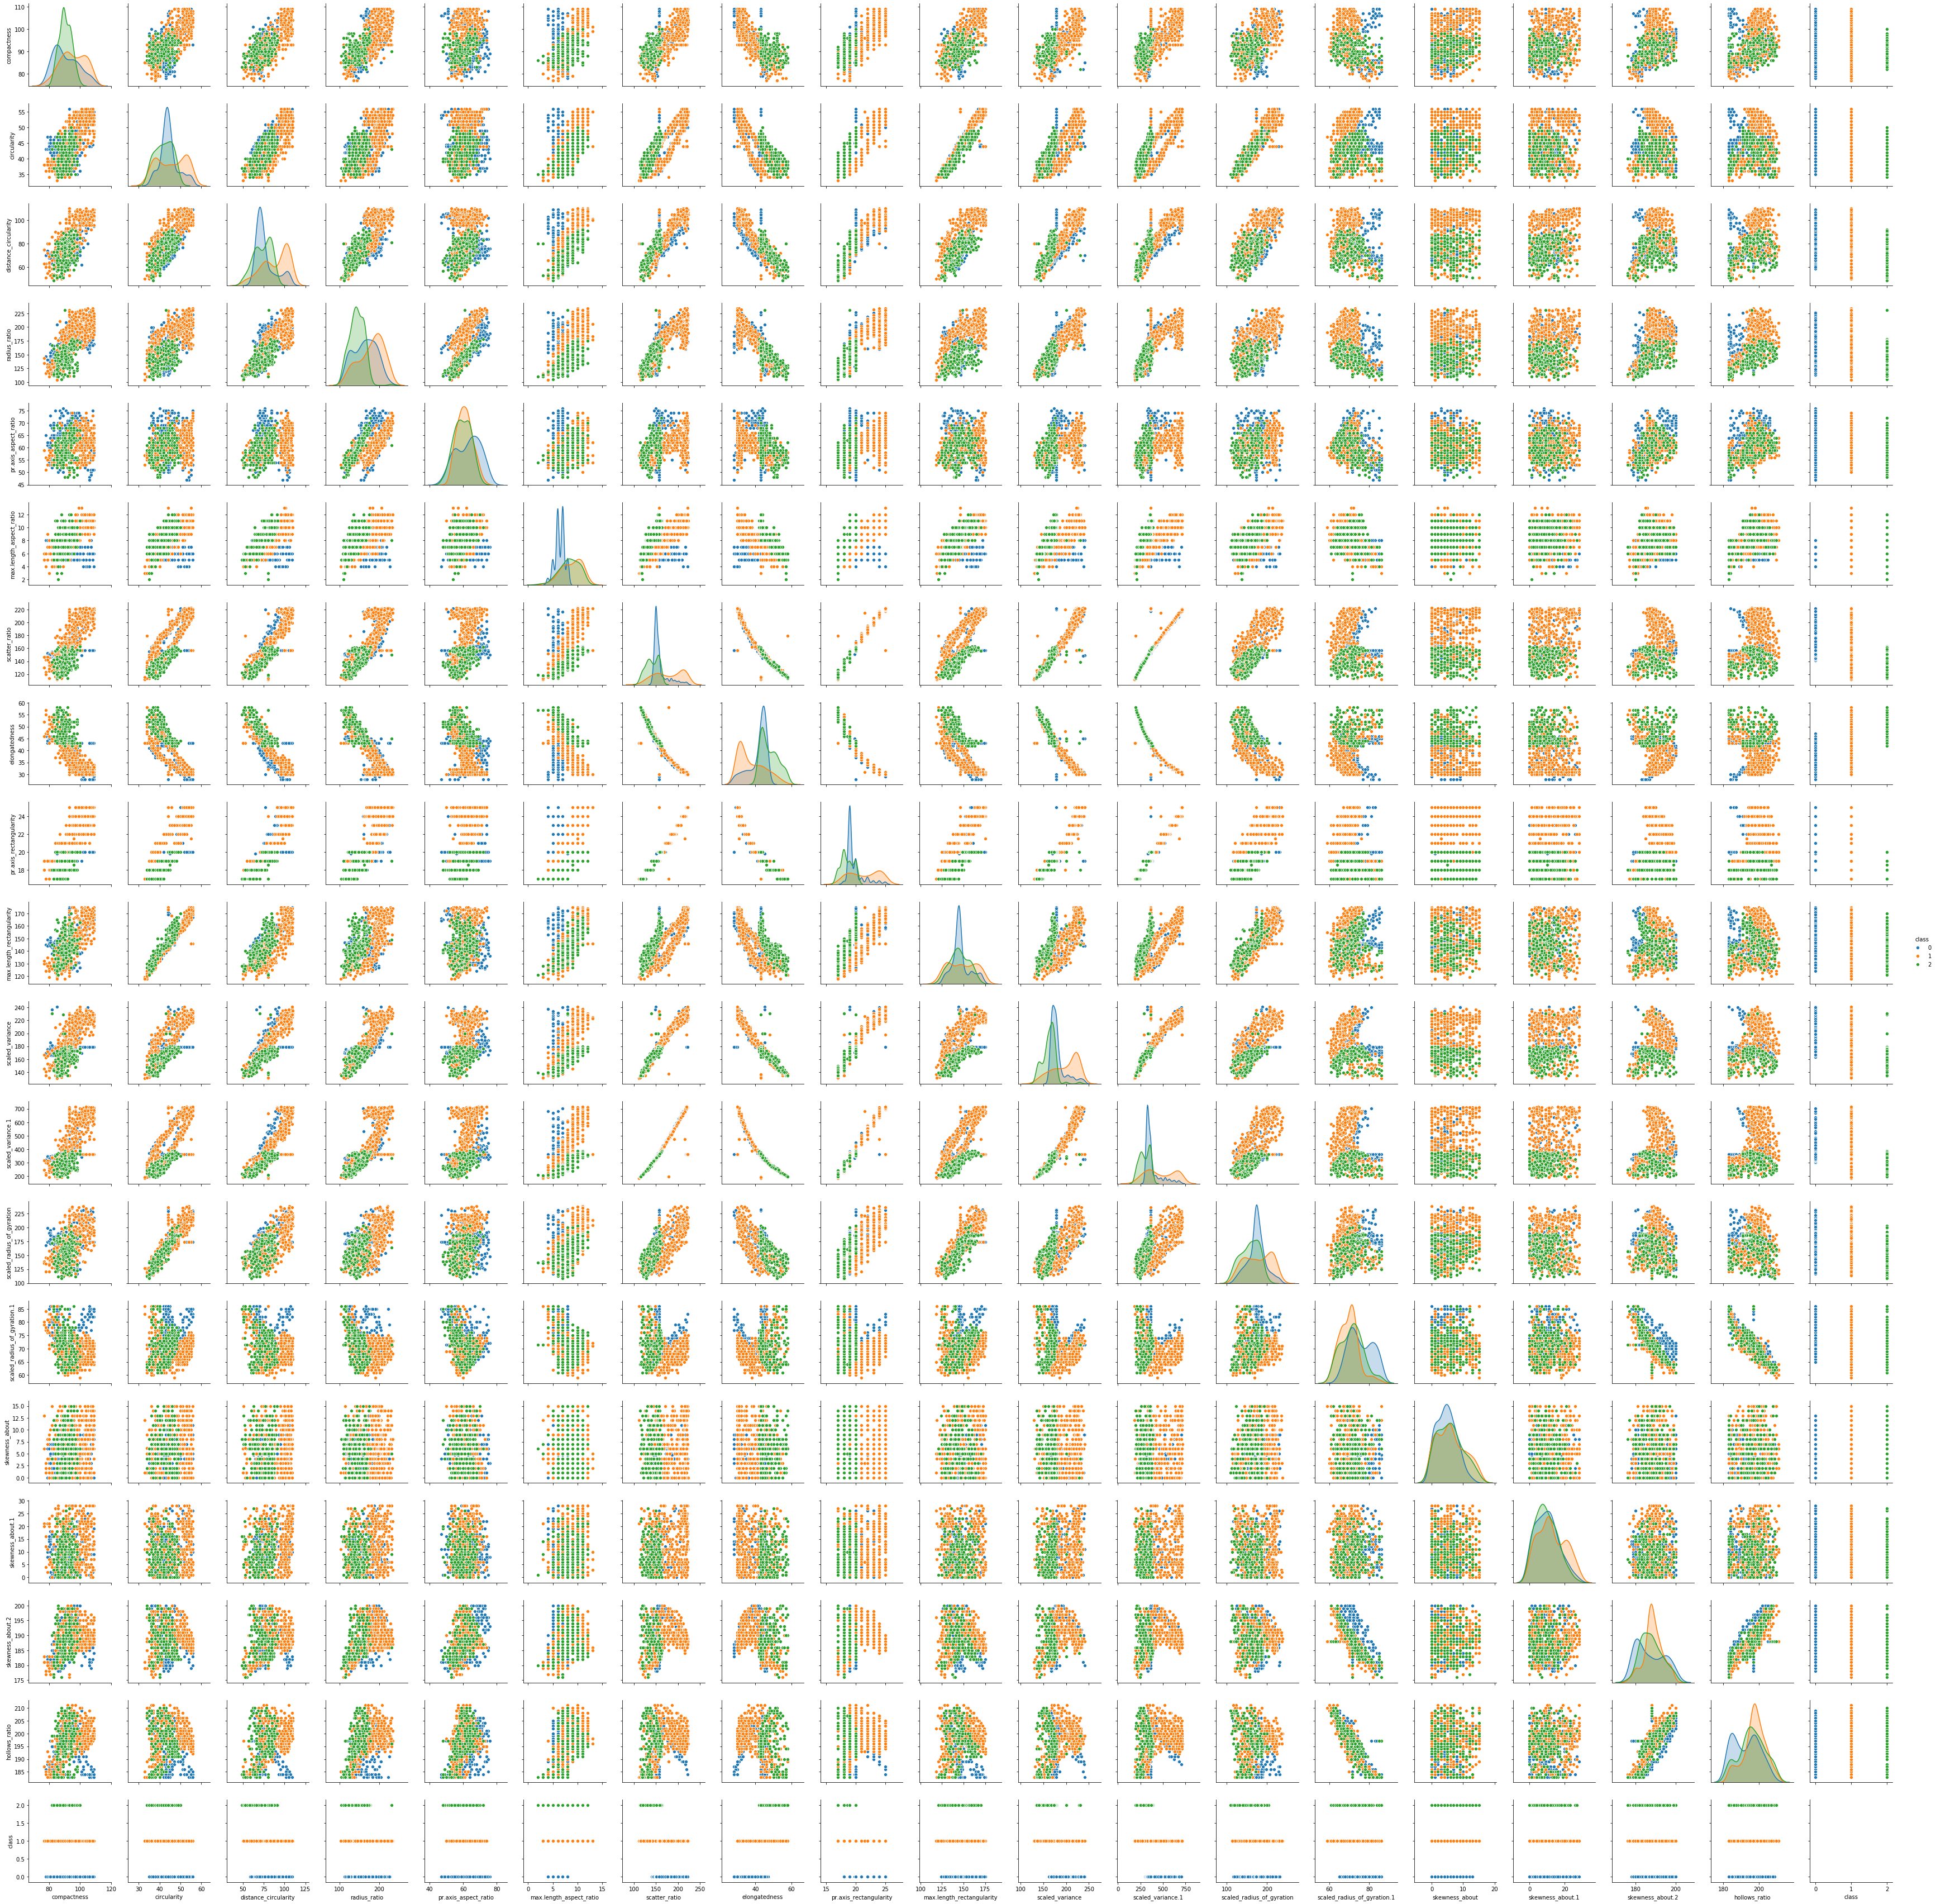

In [269]:
sns.pairplot(veh_df, hue ='class' , diag_kind = 'kde')

In [270]:
#  We do not include target variables in the analysis on PCA. Hence class col will be removed
# attributes which can  be left out - skewness_about, Skewness_about_1, maxlength_aspect_ratio  seems to not be corelated to any other attribuute
# rest of the attributes have a positive or negative corelatioon ratio with alteast  some attributes as we will inluce them in  PCA

In [271]:
# Split the vehic le data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = veh_df[veh_df.columns[1:-1]]
y = veh_df["class"]

In [272]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
train_cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.75169972  0.61583163  0.20179225  0.56100703  0.77134591
  -0.76509273  0.78780098  0.91541654  0.74646467  0.7165798   0.8883384
   0.06237558  0.14604027  0.01248979  0.00397469  0.06264491]
 [ 0.75169972  1.00118343  0.79786529  0.2389315   0.6513976   0.84522137
  -0.8683104   0.86861655  0.7295245   0.8482234   0.80335568  0.65927021
  -0.19565563  0.10964845  0.2162774   0.21371935  0.28342042]
 [ 0.61583163  0.79786529  1.00118343  0.6502575   0.48885284  0.798449
  -0.83596768  0.79445374  0.54365482  0.83739451  0.76296871  0.53825194
  -0.38795216  0.03849749  0.14536419  0.49091339  0.47199598]
 [ 0.20179225  0.2389315   0.6502575   1.00118343  0.15364181  0.29883555
  -0.35896456  0.26756017  0.12795721  0.3382203   0.2928038   0.19991593
  -0.29578646 -0.0553426  -0.01137118  0.44238442  0.35303431]
 [ 0.56100703  0.6513976   0.48885284  0.15364181  1.00118343  0.61613634
  -0.56030403  0.64049909  0.59512772  0.5947227   0.56757935  

In [273]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.84399045e-01 -1.98361958e-01 -1.94118416e-01 -5.48016983e-02
   5.71458971e-02 -1.95035729e-01  3.51129761e-01  1.56714859e-02
   6.25453716e-02 -7.67170624e-03  3.18382172e-04 -3.53557811e-01
   1.21423411e-01  8.59987832e-02  5.94948710e-01  4.11291339e-01
  -2.06487444e-03]
 [-3.05799600e-01 -1.92749482e-02  4.94553642e-02  1.17027068e-01
   4.54794388e-02  6.80422272e-02 -2.26076629e-02  6.96951200e-01
   7.48531318e-02 -3.65833203e-02 -8.50245133e-02  4.83105372e-01
  -3.14067853e-02  1.40892529e-01  3.84314275e-02  1.65972037e-01
   3.15597252e-01]
 [-2.92888234e-01  1.78434146e-01  7.87196577e-02 -1.87194544e-01
  -1.99607020e-01  9.53509820e-04 -5.16343679e-02  3.20434602e-01
   1.16817453e-01 -3.59623753e-03 -1.01154079e-01 -1.17567822e-01
   2.86200074e-01 -4.41649722e-01 -1.81242031e-01  1.04092301e-01
  -5.81023589e-01]
 [-1.31137838e-01  2.59848394e-01  4.53637144e-02 -5.28318189e-01
  -4.33180939e-01 -5.08668965e-01 -2.40070232e-01 -7.14000358e-02
 

In [274]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort() # defult on first column and least on top. Hence reverse

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(8.900592732116563, array([-0.28439904, -0.3057996 , -0.29288823, -0.13113784, -0.23261652,
       -0.31878604,  0.31680221, -0.31828332, -0.2669657 , -0.31575368,
       -0.30498582, -0.26184198,  0.07444493, -0.03676045, -0.05602217,
       -0.09467591, -0.11694529])), (2.9018430507144752, array([-0.19836196, -0.01927495,  0.17843415,  0.25984839,  0.03354333,
       -0.04202946,  0.02519553, -0.06674021, -0.20420662, -0.02604525,
       -0.01743183, -0.24410912, -0.51270235, -0.03133036,  0.02758123,
        0.49814964,  0.48775963])), (1.118478677895492, array([-0.19411842,  0.04945536,  0.07871966,  0.04536371, -0.08920429,
        0.09101307, -0.10478144,  0.08916784, -0.2053693 ,  0.12015493,
        0.10097981, -0.2051742 ,  0.12446271, -0.59791377,  0.6402433 ,
       -0.09086764, -0.12798181])), (1.087248340950455, array([-0.0548017 ,  0.11702707, -0.18719454, -0.52831819,  0.25460627,
        0.01299464,  0.05182069,  0.03311834,  0.01082442, -0.0406644 ,
        0.01208284

In [275]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 7 entries as there are 7 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 7 entries with 7 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.52294541, 0.69344029, 0.75915538, 0.82303557, 0.87483886,
       0.90805495, 0.93330411, 0.94696676, 0.95896058, 0.96939334,
       0.97875135, 0.98443098, 0.98877651, 0.99227092, 0.99548913,
       0.99798986, 1.        ])

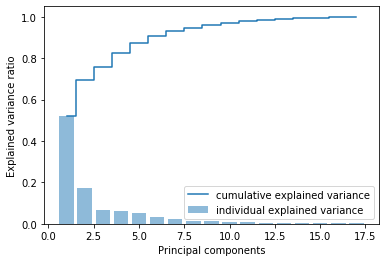

In [276]:
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [277]:
X_std.shape

(846, 17)

In [278]:
X_train_std.shape

(569, 17)

In [279]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:9])   # Reducing from 17 to 9 dimension space

X_std_9D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_9D)  # converting array to dataframe for pairplot

In [280]:
Proj_data_df.shape

(846, 9)

In [281]:
y.shape

(846,)

In [282]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

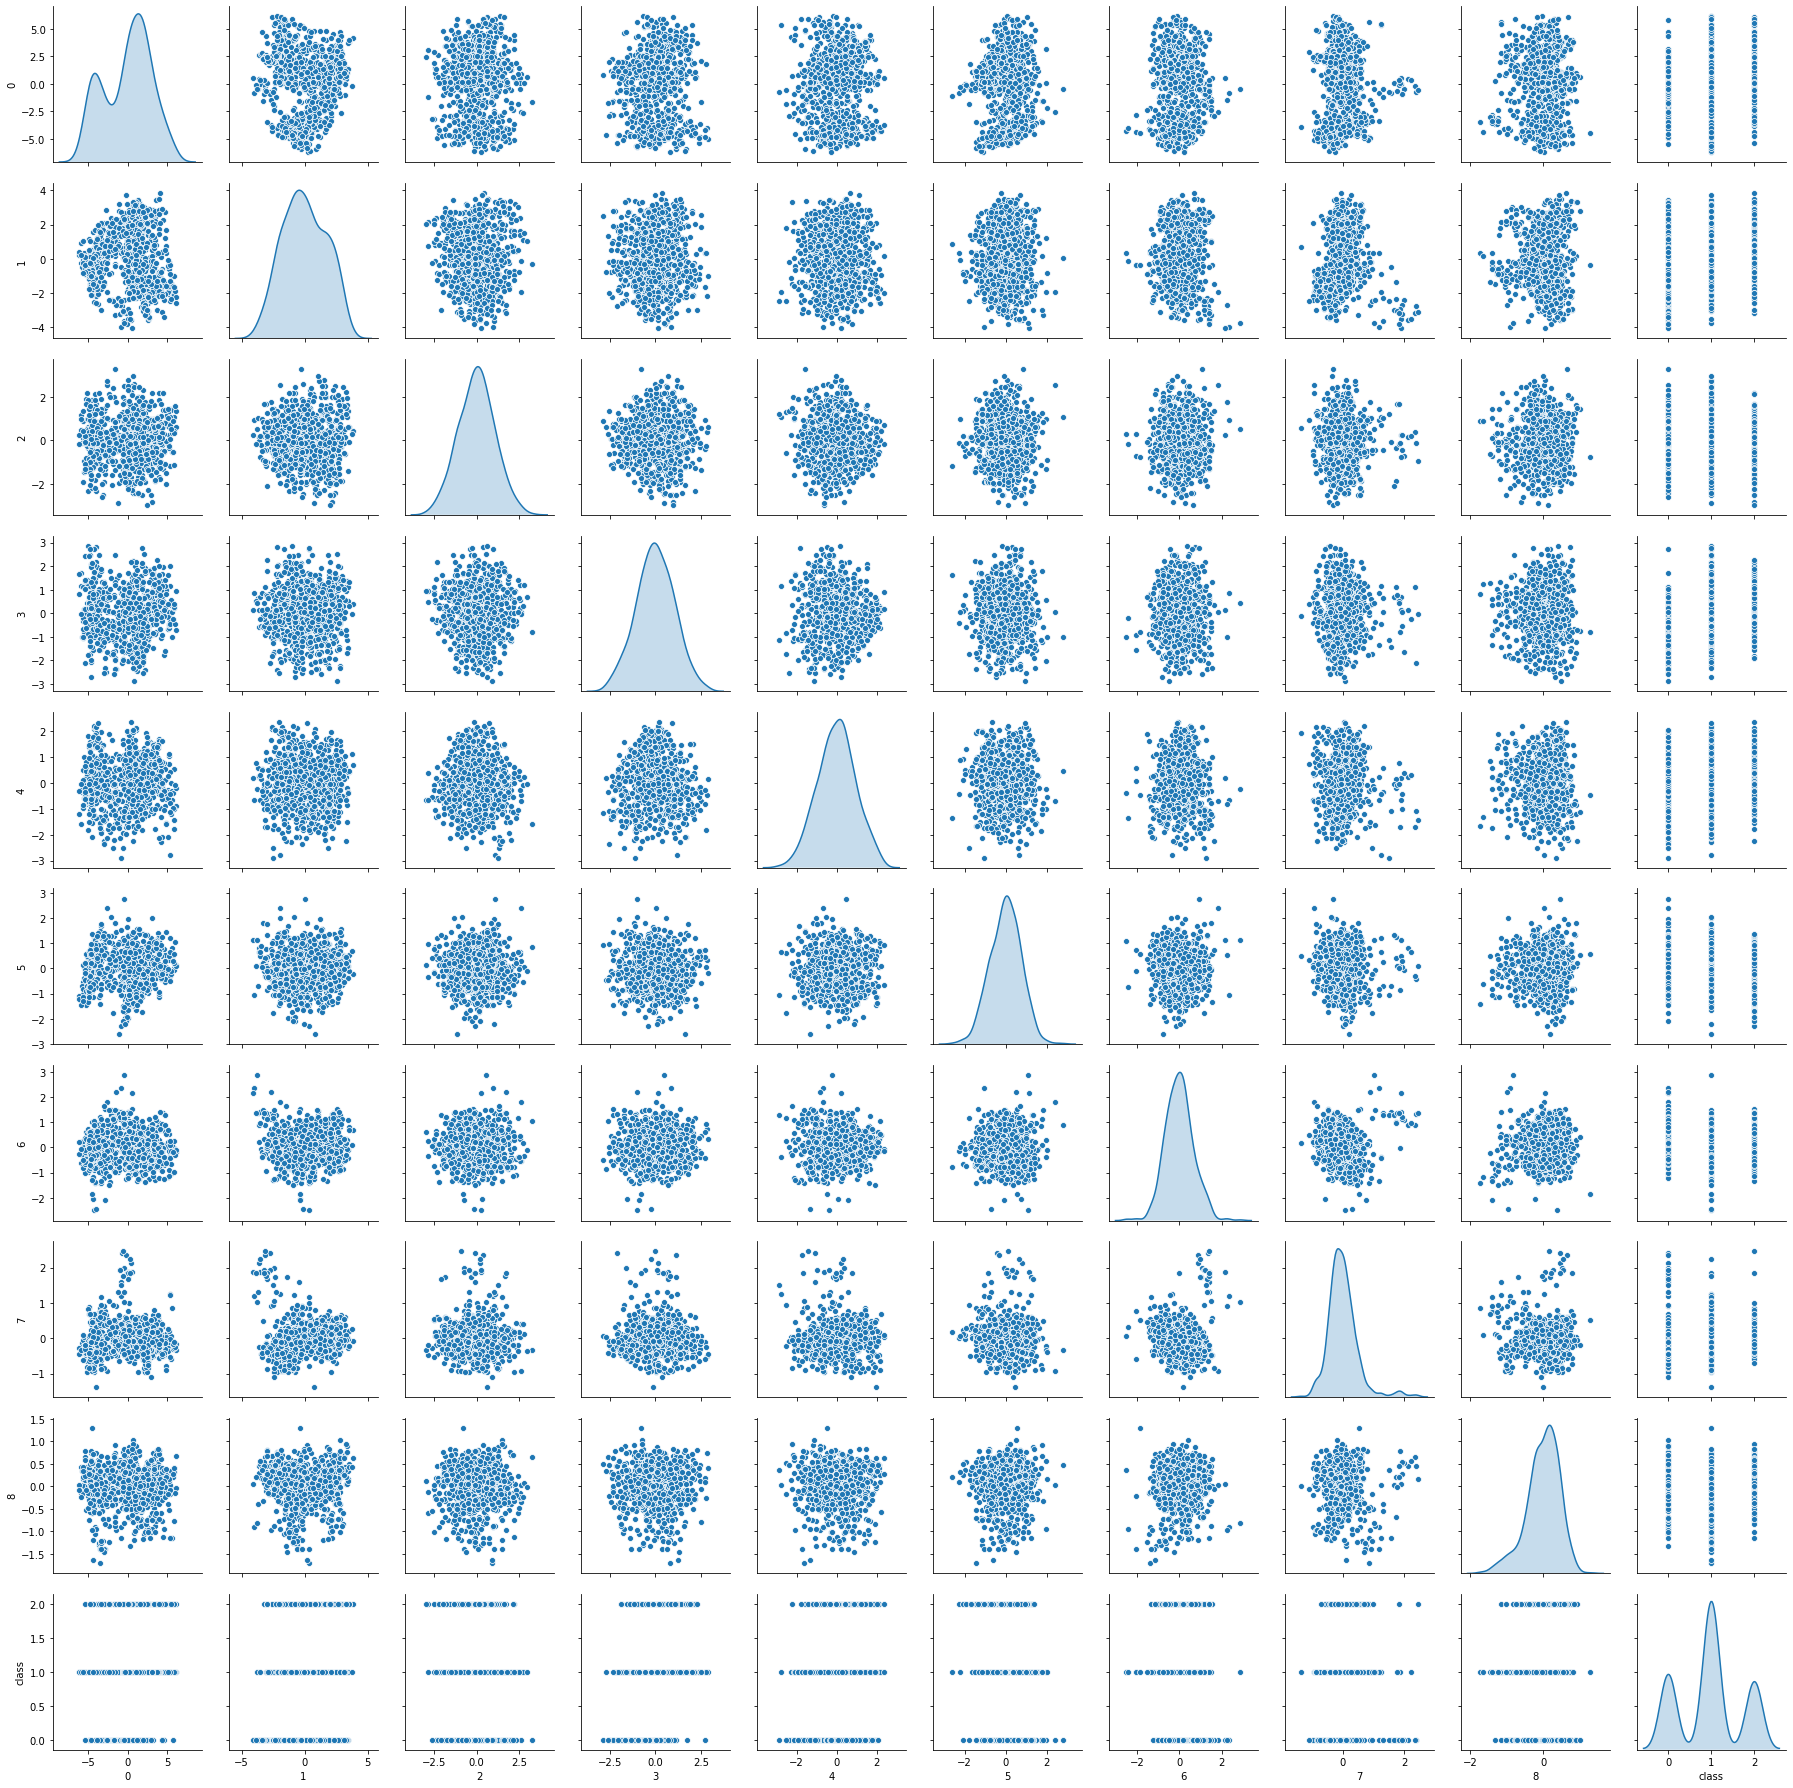

In [283]:
#Let us check it visually, we can see that the dimesnions obtained by PCA are independent
Proj_data_veh_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

In [284]:
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df, y, test_size = 0.30)  


In [318]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', C= 5)  
svclassifier.fit(X_train, y_train)  

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [319]:
y_pred = svclassifier.predict(X_test)  

In [320]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[ 62  12   2]
 [  7 106   2]
 [  2   3  58]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        76
           1       0.88      0.92      0.90       115
           2       0.94      0.92      0.93        63

    accuracy                           0.89       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.89      0.89      0.89       254



In [321]:
# linear kernel with C= 1 has accuarcy 0.89
# C = 0.5, 0.05 has accuracy 0.89
# C= 0.01 has accuracy 0.85

# Thus max accuracy is with C= 0.5,1,0,05


In [317]:
## Let us try RBF kernel

In [290]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [291]:
y_pred = svclassifier.predict(X_test)  

In [292]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[ 74   2   0]
 [  3 110   2]
 [  0   5  58]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.94      0.96      0.95       115
           2       0.97      0.92      0.94        63

    accuracy                           0.95       254
   macro avg       0.96      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



In [293]:
# rbf performs better than linear. Let us try rbf for different values of C to find optimal
# try C values - 0.01, 0.05, 0.5, 1

In [306]:
svclassifier = SVC(kernel='rbf', C= 0.5)  
svclassifier.fit(X_train, y_train) 

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [307]:
y_pred = svclassifier.predict(X_test)  

In [308]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[ 74   2   0]
 [  3 110   2]
 [  2   5  56]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        76
           1       0.94      0.96      0.95       115
           2       0.97      0.89      0.93        63

    accuracy                           0.94       254
   macro avg       0.95      0.94      0.94       254
weighted avg       0.95      0.94      0.94       254



In [309]:
# C= 1, overall accuracy is 0.95:
# C= 0.5 overall accouracy is 0.94
# C= 0.05 overal accuracy is 0.63
# C = 0.01 Overall accuracy is 0.45

# hence best results are given by 0.5 with rbf kernel